# Project_Team_ID: "PTID-CDS-SEP-24-2093"

##PRCP-1016-Heart Disease Prediction

## Business case : Based on the given data we need to predict the Heart_disease

## Problem Statement

##### Cardiovascular disease or heart disease is the leading cause of death amongst women and men and amongst most racial/ethnic groups in the include blood vessel diseases, such as coronary artery disease. From the CDC, roughly every 1 in United States. Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From the CDC, roughly every 1 in 4 deaths each year are due to heart disease. The WHO states that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/may not getting chance of heart disease.The term heart disease is often used interchangeably with the term cardiovascular disease. Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('/content/labels.csv')

In [3]:
df2=pd.read_csv('/content/values.csv')

In [4]:
df1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
df=pd.merge(df2,df1) # we first merged the two different csv files

In [6]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# DOMAIN ANALYSIS
TARGET COLUMN == HEART DISEASE PRESENT

In this project we are going to analyze that how other feature of dataset affecting heart disease
##1.PATIENT ID:
Id of particular patient, Id is used to identify a patient,this is a unique column so that its not affect to heart disease

##2.SLOPE OF PEAK EXERCISE ST SEGMENT:
While a high ST depression is considered normal & healthy. The “ slope ” hue, refers to the peak exercise ST segment, with values: 1: upsloping, 2: flat, 3: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

##3.THAL:
A blood disorder called thalassemia,[normal, reversible defect, fixed defect]

##4.RESTING BLOOD PRESSURE:
blood pressure tells a lot about your general health. High blood pressure or hypertension can lead to several heart related issues and other medical conditions.Uncontrolled high blood pressure can lead to stroke.

##5.CHEST PAIN TYPE:
Most of the chest pain causes are not dangerous to health, but some are serious, while the least cases are life-threatening.[TA: typical angina(1), ATA: Atypical angina(2), NAP: non-anginal pain(3), ASY: asymtomatic(4) ]

##6.NUM OF MAJOR VESSELS:
Major Blood Vessels of the Heart: Blood exits the right ventricle through the pulmonary trunk artery. Approximately two inches superior to the base of the heart, this vessel branches into the left and right pulmonary arteries, which transport blood into the lungs.[number of major vessels: 0 to 3]

##7.FASTING BLOOD SUGAR:
Your Fasting blood sugar level of 120 is a High Fasting blood sugar level. If your Fasting blood sugar is in between 74 mg/dL and 99 mg/dL, then you need not worry as 74-99 mg/dL is the normal range for Fasting blood sugar. But if your Fasting blood sugar is lesser or greater than the above values, then there may be some problem in your body. (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

##8.RESTING EKG/ECG RESULT:
The electrocardiogram (ECG or EKG) is a test that measures the heart’s electrical activity, and a resting ECG is administered when the patient is at rest. It involves noninvasive recording with adhesive skin electrodes placed on specially prepared spots on the skin, and it plots out the heart's activity on a graph. It is used to determine the health of the heart and circulatory system and to help diagnose issues with associated body systems.[0: normal, 1:having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2:showing probable or definite left ventricular hypertrophy by Estes’ criteria]

##9.SERUM CHOLESTEROL:
A person’s serum cholesterol level represents the amount of total cholesterol in their blood. A person’s serum cholesterol level comprises the amount of high-density lipoprotein (HDL), low-density lipoprotein (LDL), and triglycerides in the blood. Triglycerides are a type of fat bundled with cholesterol.

##10.oldpeak_eq_st_depression:
oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

##11.SEX:
sex (1 = male; 0 = female)

##12.AGE:
age in years

##13.MAX HEART RATE:
It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.[Average heart rate: 60 to 100 bpm]

##14.EXERCISE INDUCED ANGINA:
Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.[0: no, 1: yes]

##15.HEART DISEASE PRESENT:
[0: no heart disease present, 1: heart disease present]

### Basic Checks

In [7]:
df.shape

(180, 15)

In [8]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [10]:
for column in df.columns:
    num_unique_values=df[column].nunique()
    print(f"number of unique values in {column}:{num_unique_values}")

number of unique values in patient_id:180
number of unique values in slope_of_peak_exercise_st_segment:3
number of unique values in thal:3
number of unique values in resting_blood_pressure:36
number of unique values in chest_pain_type:4
number of unique values in num_major_vessels:4
number of unique values in fasting_blood_sugar_gt_120_mg_per_dl:2
number of unique values in resting_ekg_results:3
number of unique values in serum_cholesterol_mg_per_dl:118
number of unique values in oldpeak_eq_st_depression:34
number of unique values in sex:2
number of unique values in age:40
number of unique values in max_heart_rate_achieved:73
number of unique values in exercise_induced_angina:2
number of unique values in heart_disease_present:2


In [11]:
df.describe(include='all')

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
unique,180,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0z64un,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.550000,NaN,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,NaN,0.618838,NaN,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,NaN,1.000000,NaN,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,NaN,1.000000,NaN,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,NaN,1.000000,NaN,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,NaN,2.000000,NaN,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000


In [12]:
df.isnull().sum()

,0
patient_id,0
slope_of_peak_exercise_st_segment,0
thal,0
resting_blood_pressure,0
chest_pain_type,0
num_major_vessels,0
fasting_blood_sugar_gt_120_mg_per_dl,0
resting_ekg_results,0
serum_cholesterol_mg_per_dl,0
oldpeak_eq_st_depression,0


### No Columns has NullValues

In [13]:
import pandas as pd



# Iterate through each column
for column in df.columns:
    # Calculate value counts for the current column
    value_counts = df[column].value_counts()

    # Print the column name and its value counts
    print(f"Column: {column}")
    print(value_counts)
    print("\n")

Column: patient_id
patient_id
0z64un    1
ryoo3j    1
yt1s1x    1
l2xjde    1
oyt4ek    1
         ..
5qfar3    1
2s2b1f    1
nsd00i    1
0xw93k    1
2nx10r    1
Name: count, Length: 180, dtype: int64


Column: slope_of_peak_exercise_st_segment
slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64


Column: thal
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64


Column: resting_blood_pressure
resting_blood_pressure
130    26
140    22
120    21
110    11
150    10
160     9
128     8
112     8
125     7
108     5
124     5
118     4
135     4
145     4
180     3
132     3
138     3
152     2
178     2
136     2
100     2
142     2
134     2
115     2
126     2
170     1
106     1
144     1
122     1
156     1
172     1
105     1
155     1
102     1
94      1
117     1
Name: count, dtype: int64


Column: chest_pain_type
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64


Column: n

In [14]:
# Check if 'patient_id' is in the DataFrame columns
if 'patient_id' in df.columns:
    df = df.drop('patient_id', axis=1)
else:
    print("Column 'patient_id' not found in DataFrame")

In [15]:
duplicates=df[df.duplicated()]
print(duplicates.sum())

slope_of_peak_exercise_st_segment         0
thal                                      0
resting_blood_pressure                    0
chest_pain_type                           0
num_major_vessels                         0
fasting_blood_sugar_gt_120_mg_per_dl      0
resting_ekg_results                       0
serum_cholesterol_mg_per_dl               0
oldpeak_eq_st_depression                0.0
sex                                       0
age                                       0
max_heart_rate_achieved                   0
exercise_induced_angina                   0
heart_disease_present                     0
dtype: object


## There are no duplicates in our dataset

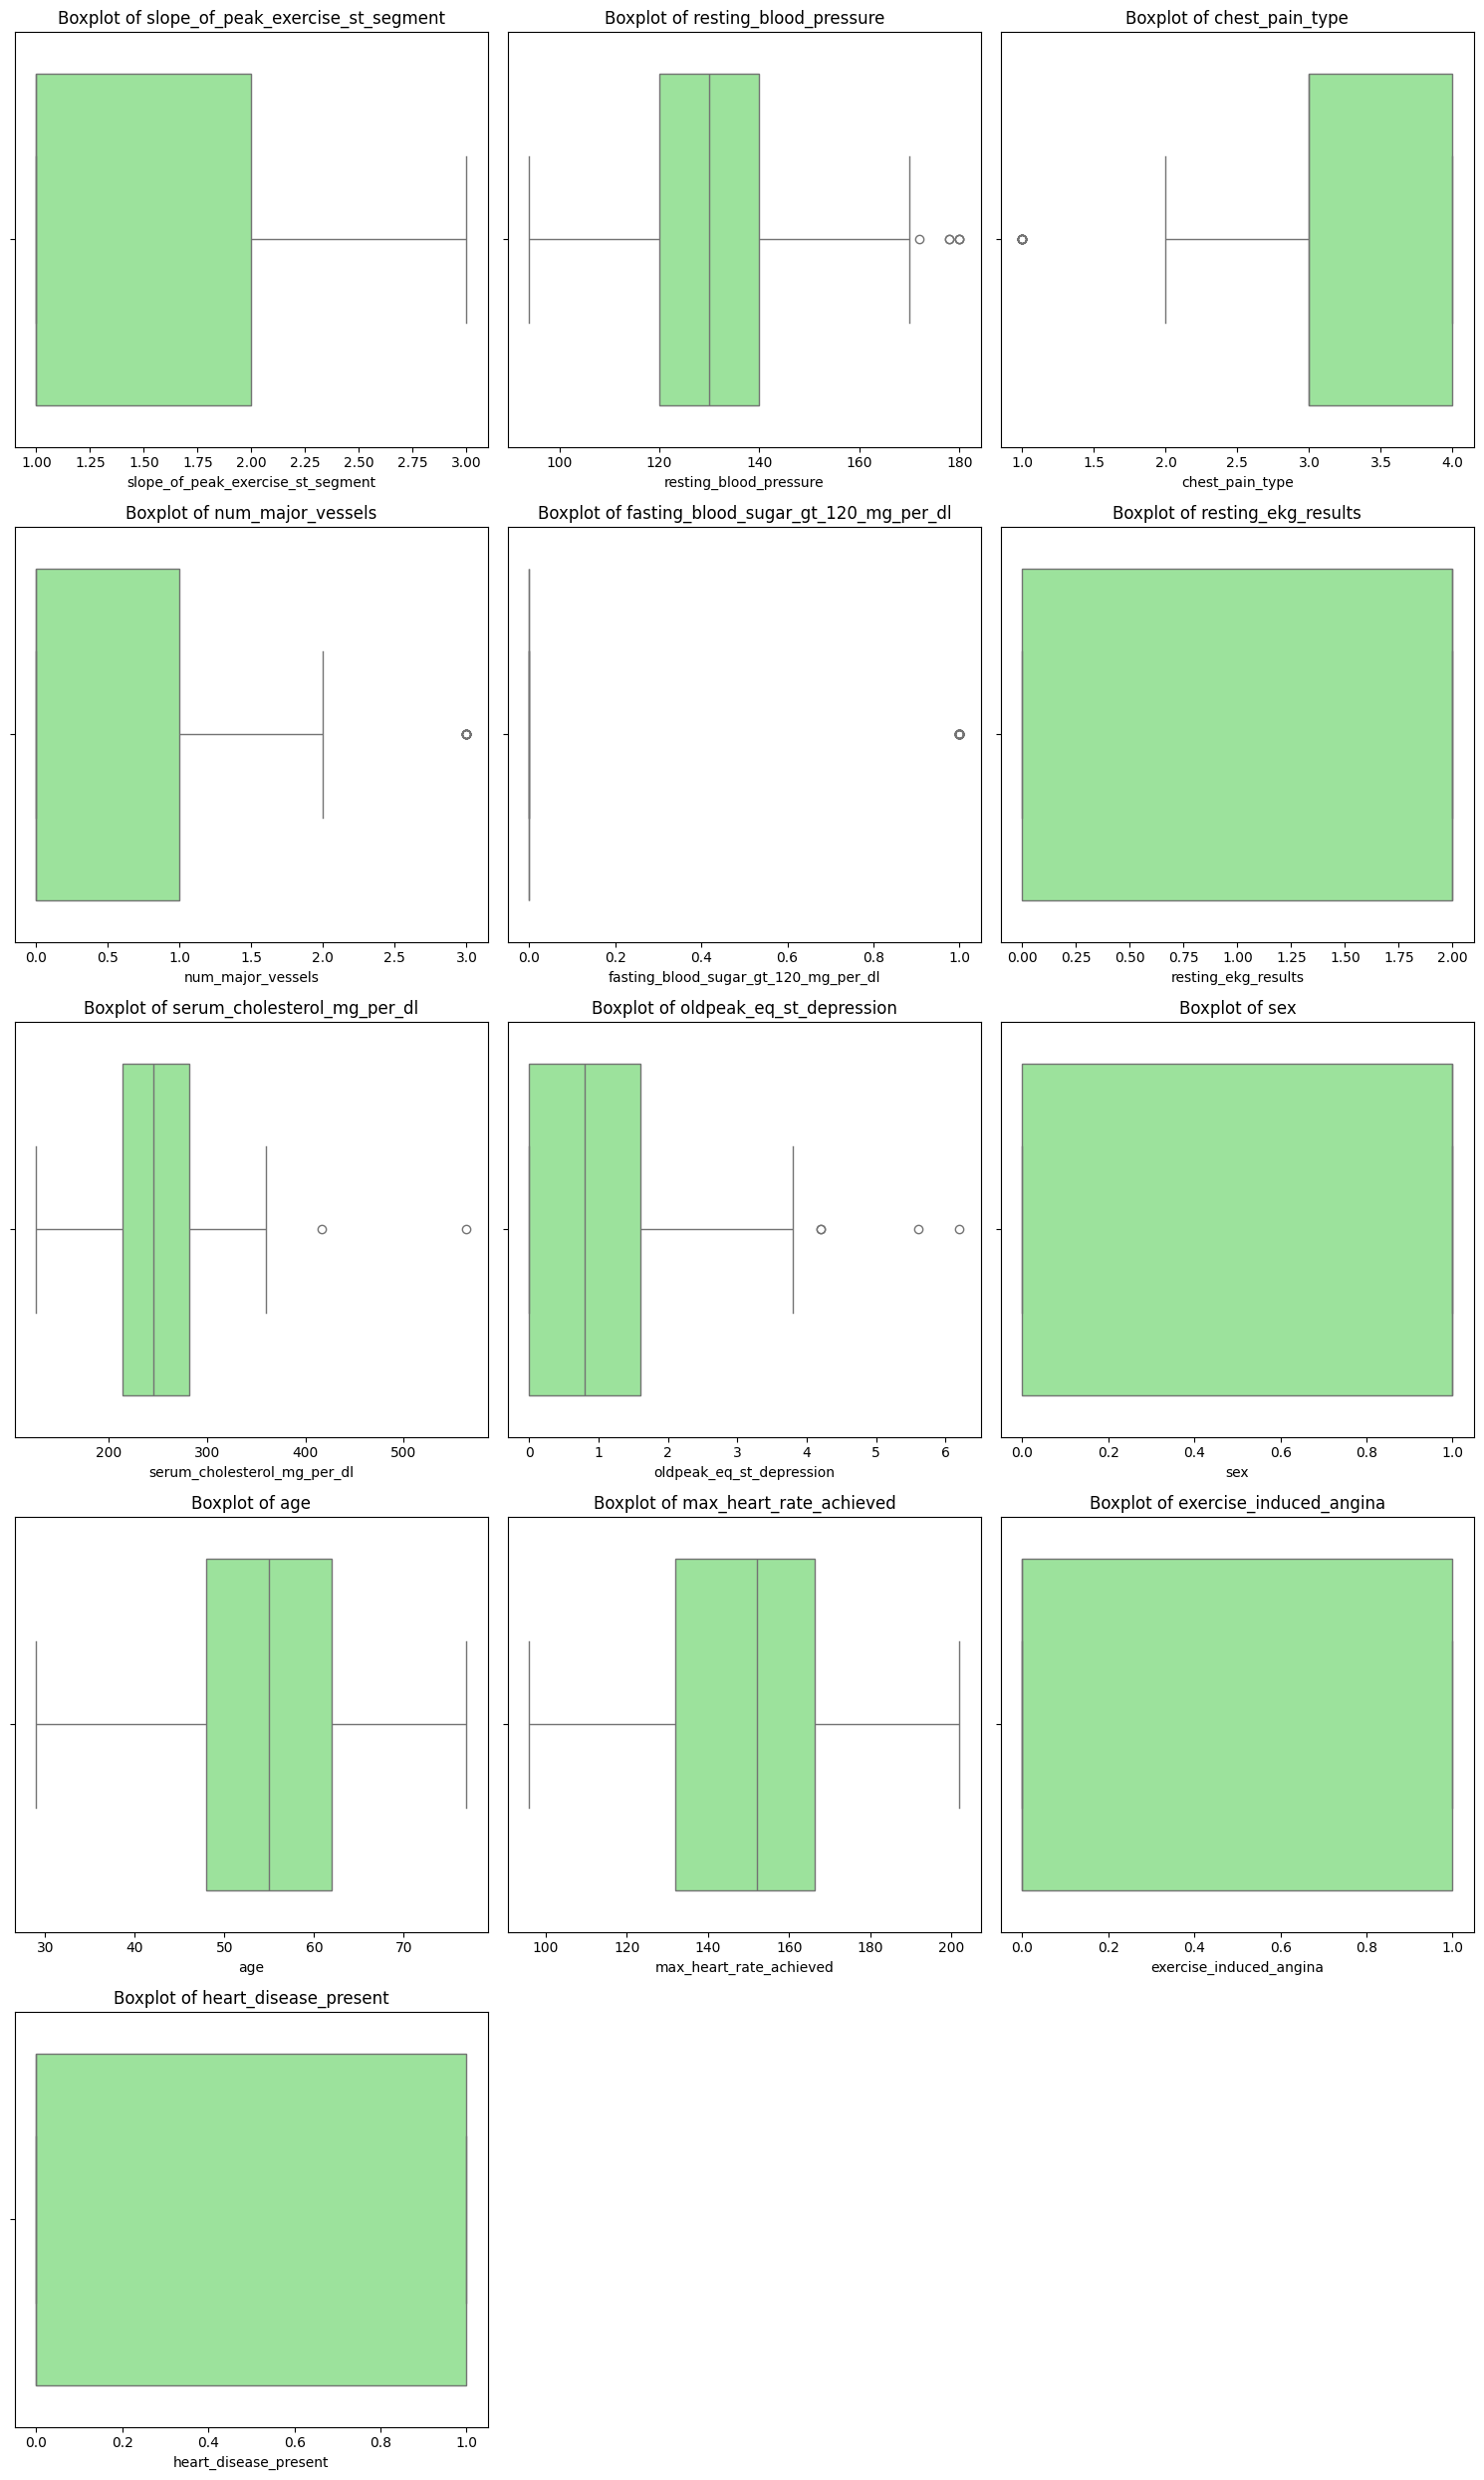

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Define the number of plots per row
plots_per_row = 3

# Iterate over only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns=df.select_dtypes(include=['category']).columns
num_columns = len(numeric_columns)

# Calculate the number of rows needed
num_rows = (num_columns + plots_per_row - 1) // plots_per_row

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15, 5* num_rows))

# Flatten the axes array to easily iterate through it
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust subplot spacing
plt.show()

BOX PLOTS FOR ALL THE NUMERICAL COLUMNS FOR OUTLIERS DETECTION.
resting blood pressure,type of chest pain,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression had outliers

In [17]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

In [18]:
outliers.sum()

np.int64(52)

there were 52 outliers but not all were to be dropped

In [19]:
#handling serum_cholesterol_mg_per_dl column
df[df['serum_cholesterol_mg_per_dl']>400]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


serum_cholesterol_mg_per_dl greater than 400 is a very rare cases so it is a possible outliers .so we dropped those rows

In [20]:
df.drop(index=60,inplace=True)

In [21]:
df.drop(index=43,inplace=True)

In [22]:
df['oldpeak_eq_st_depression'].value_counts()

,count
oldpeak_eq_st_depression,
0.0,56
1.4,11
1.6,9
1.2,9
0.2,7
0.6,7
1.0,7
0.4,7
1.8,6


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
df[df['oldpeak_eq_st_depression']>6]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
162,3,reversible_defect,160,4,3,0,2,164,6.2,0,62,145,0,1


oldpeak_eq_st_depression greater than 6 is also a outlier so we dropped than row

In [25]:
df.drop(index=162,inplace=True)

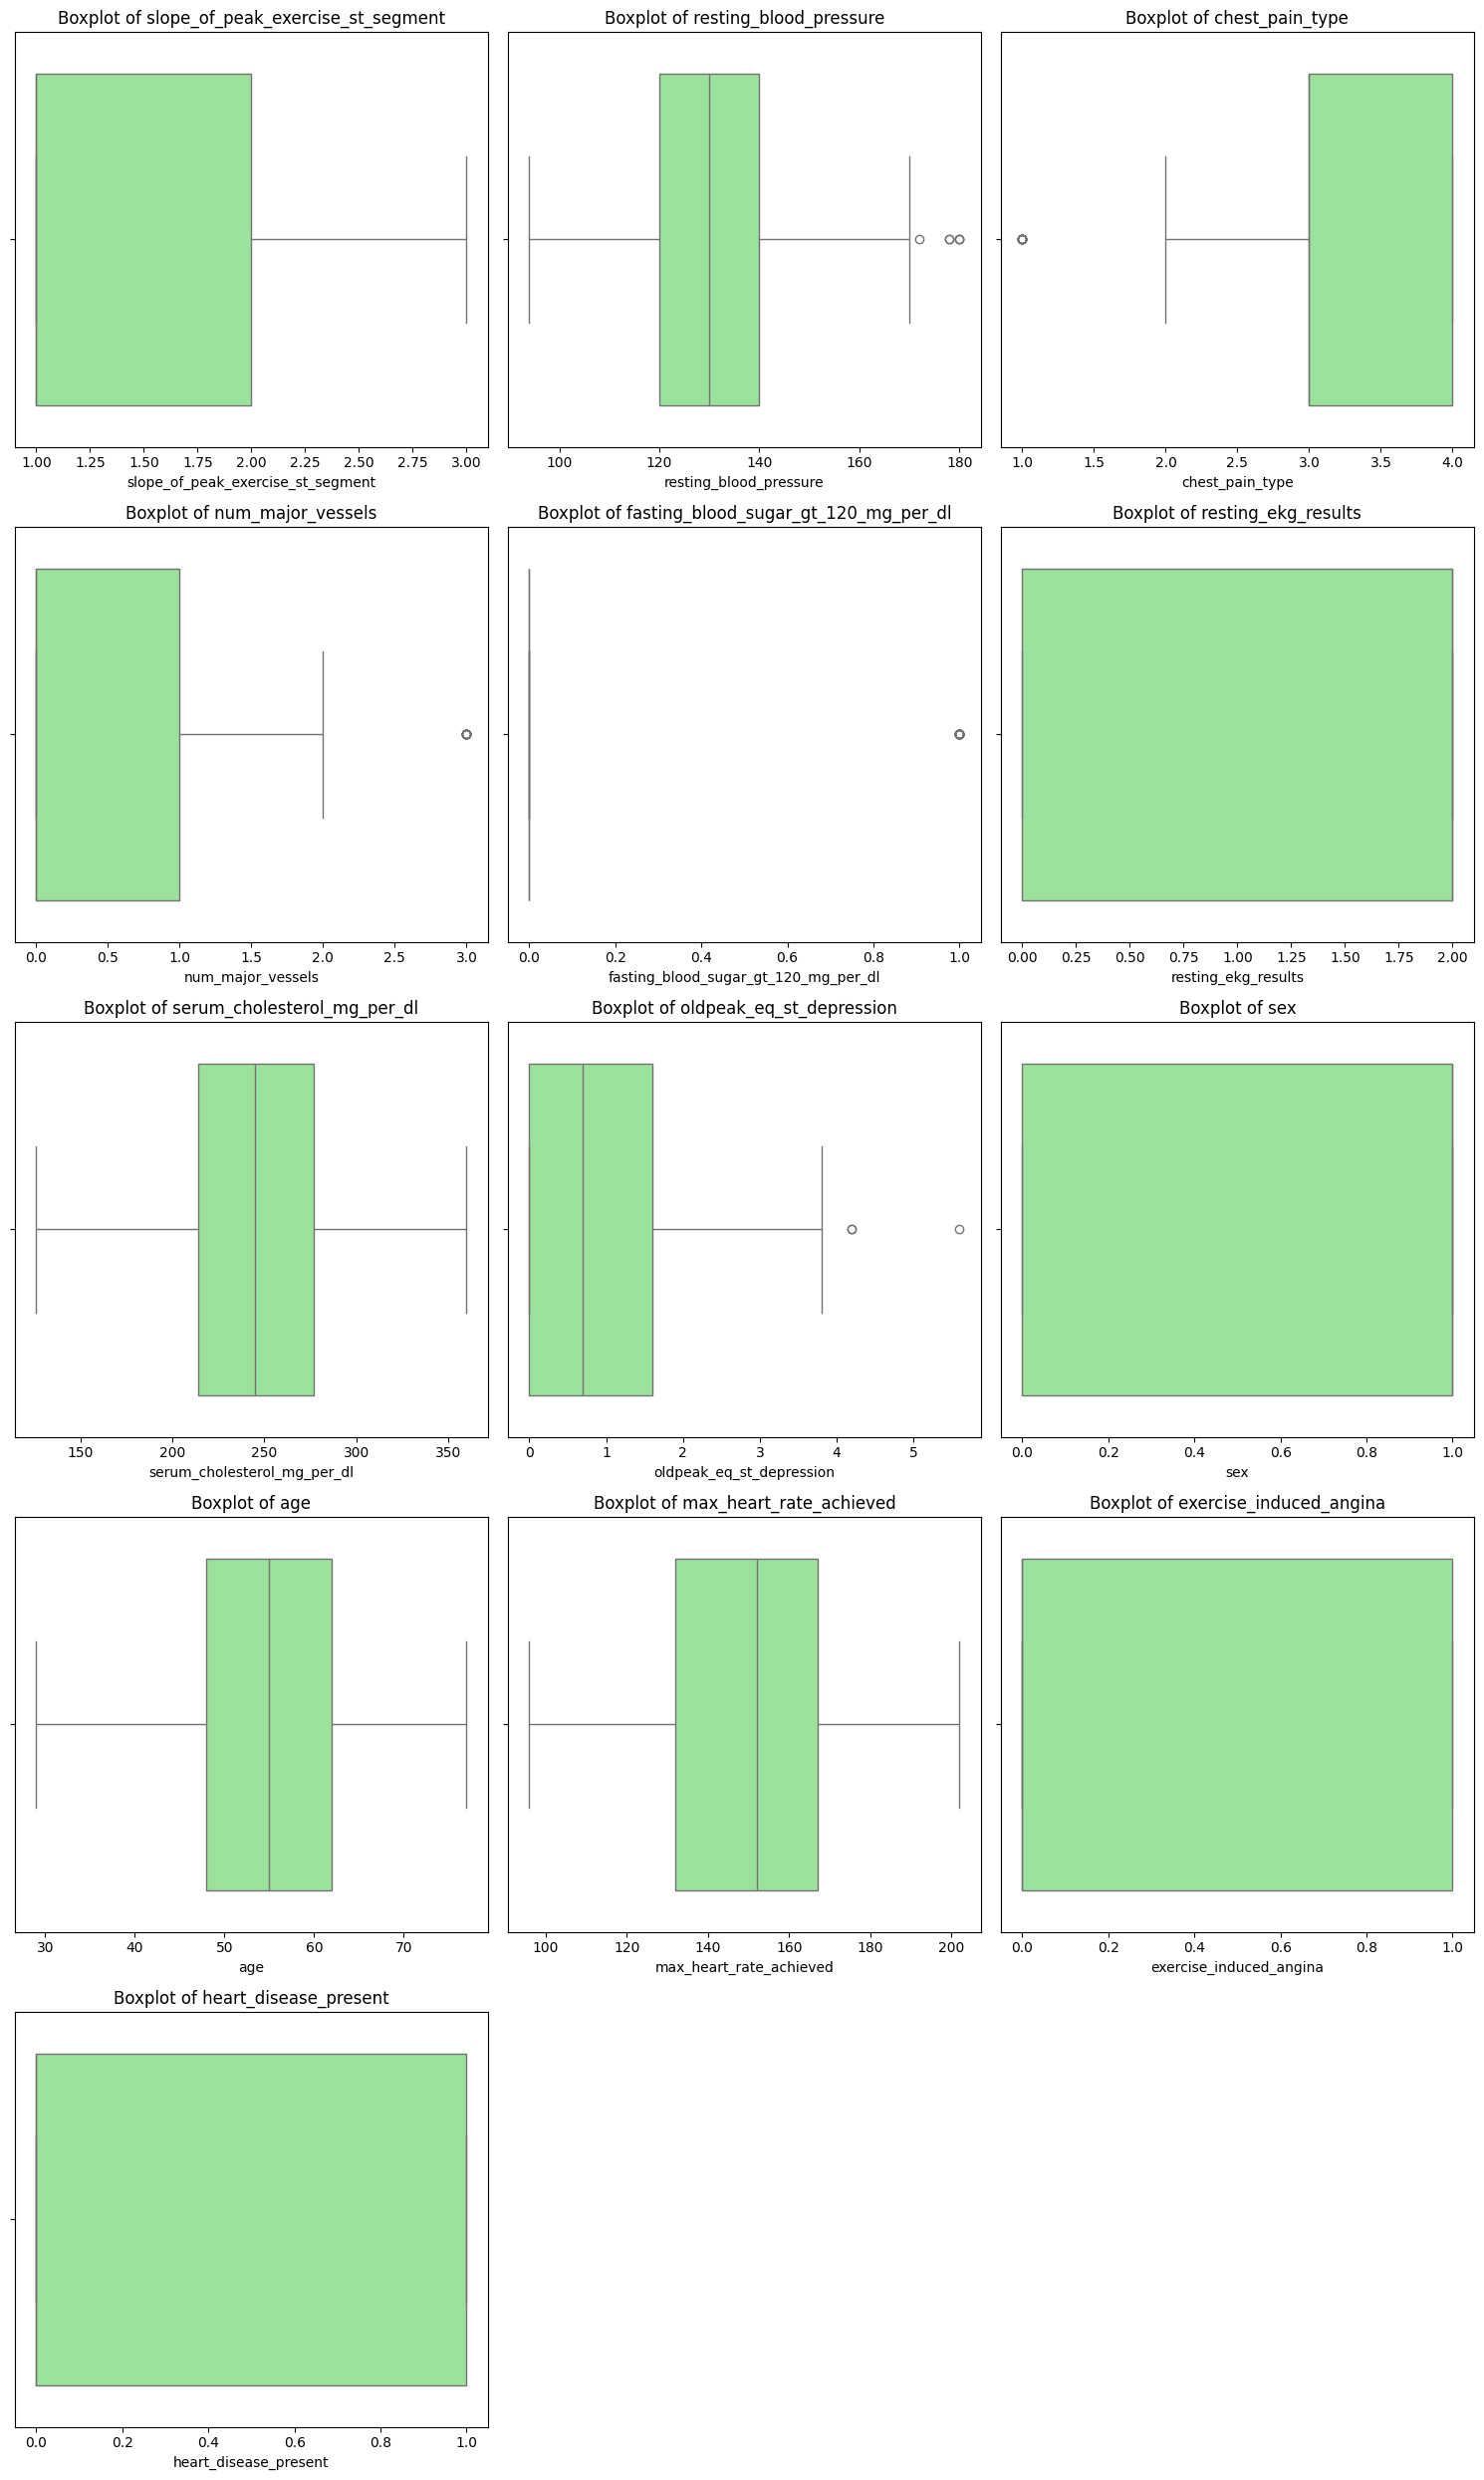

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Define the number of plots per row
plots_per_row = 3

# Iterate over only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns=df.select_dtypes(include=['category']).columns
num_columns = len(numeric_columns)

num_rows = (num_columns + plots_per_row - 1) // plots_per_row

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array to easily iterate through it
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust subplot spacing
plt.show()

According to our research resting blood pressure greater than 180 is also possible.so even after some values being outliers we did not drop it.
Same is the case with oldpeak_eq_st_depression.

##univariate analysis

In [27]:
import seaborn as sns

<Axes: xlabel='slope_of_peak_exercise_st_segment'>

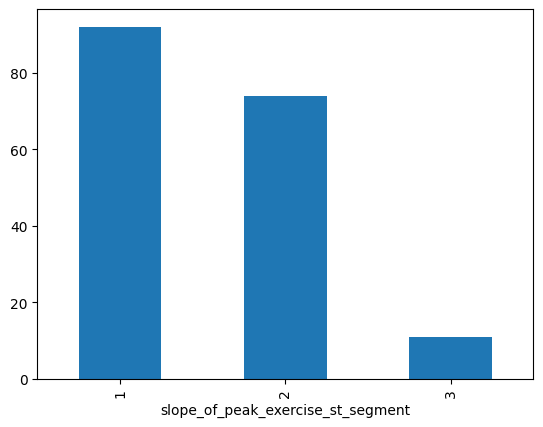

In [28]:
df['slope_of_peak_exercise_st_segment'].value_counts().plot(kind='bar')

majority of people had type-1 slope_of_peak_exercise_st_segment

##OBSEVATION
In this observation we will see that  upsloping is more than other values


<Axes: ylabel='count'>

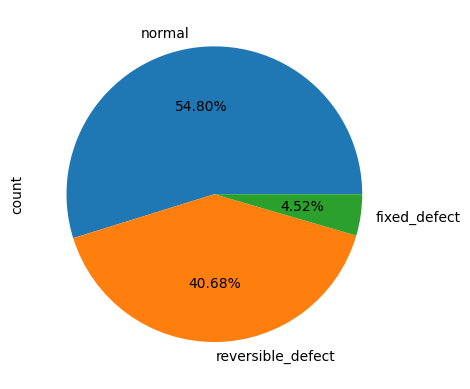

In [29]:
df['thal'].value_counts().plot(kind='pie',autopct='%0.2f%%')

thallium stress test of more than half of the people was normal

in this observation we will see that fixed defect is lesser than other values

<Axes: ylabel='Frequency'>

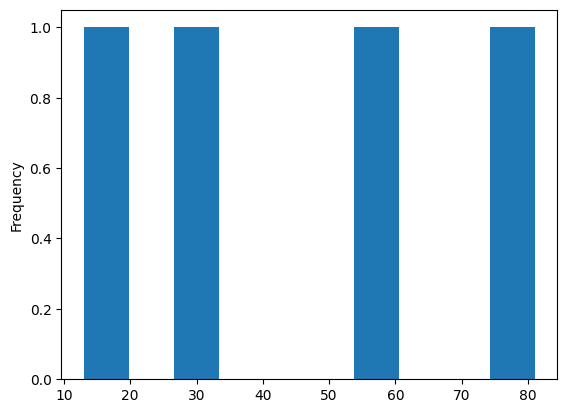

In [30]:
df['chest_pain_type'].value_counts().plot(kind='hist')

In [31]:
df['fasting_blood_sugar_gt_120_mg_per_dl'].value_counts()

,count
fasting_blood_sugar_gt_120_mg_per_dl,
0,149
1,28


<Axes: ylabel='count'>

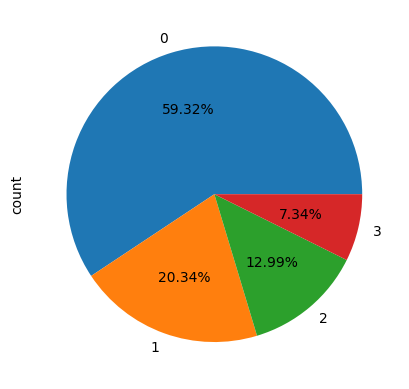

In [32]:
df['num_major_vessels'].value_counts().plot(kind='pie',autopct='%0.2f%%')

array([[<Axes: title={'center': 'slope_of_peak_exercise_st_segment'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>,
        <Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'fasting_blood_sugar_gt_120_mg_per_dl'}>,
        <Axes: title={'center': 'resting_ekg_results'}>,
        <Axes: title={'center': 'serum_cholesterol_mg_per_dl'}>,
        <Axes: title={'center': 'oldpeak_eq_st_depression'}>],
       [<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'max_heart_rate_achieved'}>,
        <Axes: title={'center': 'exercise_induced_angina'}>],
       [<Axes: title={'center': 'heart_disease_present'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

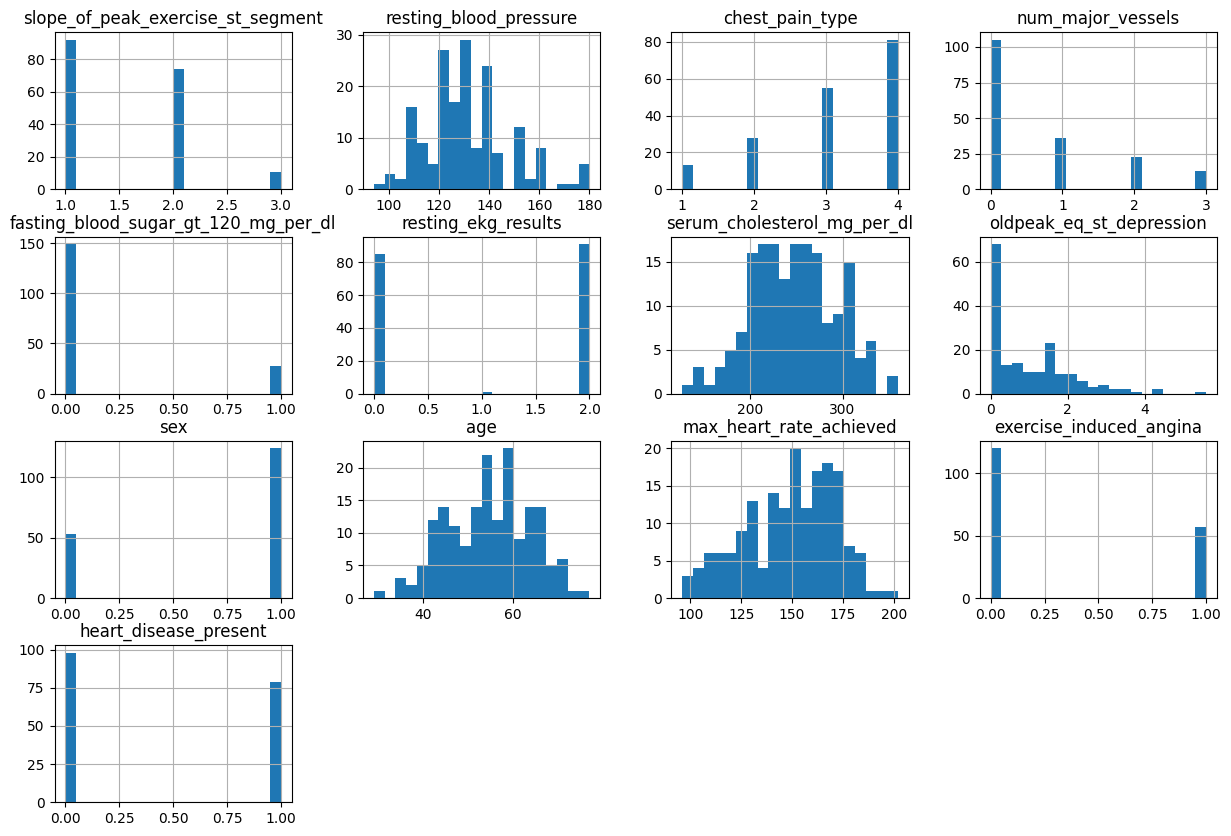

In [33]:
df.hist(bins=20,figsize=(15,10))

Above are the probability distribution of all the columns

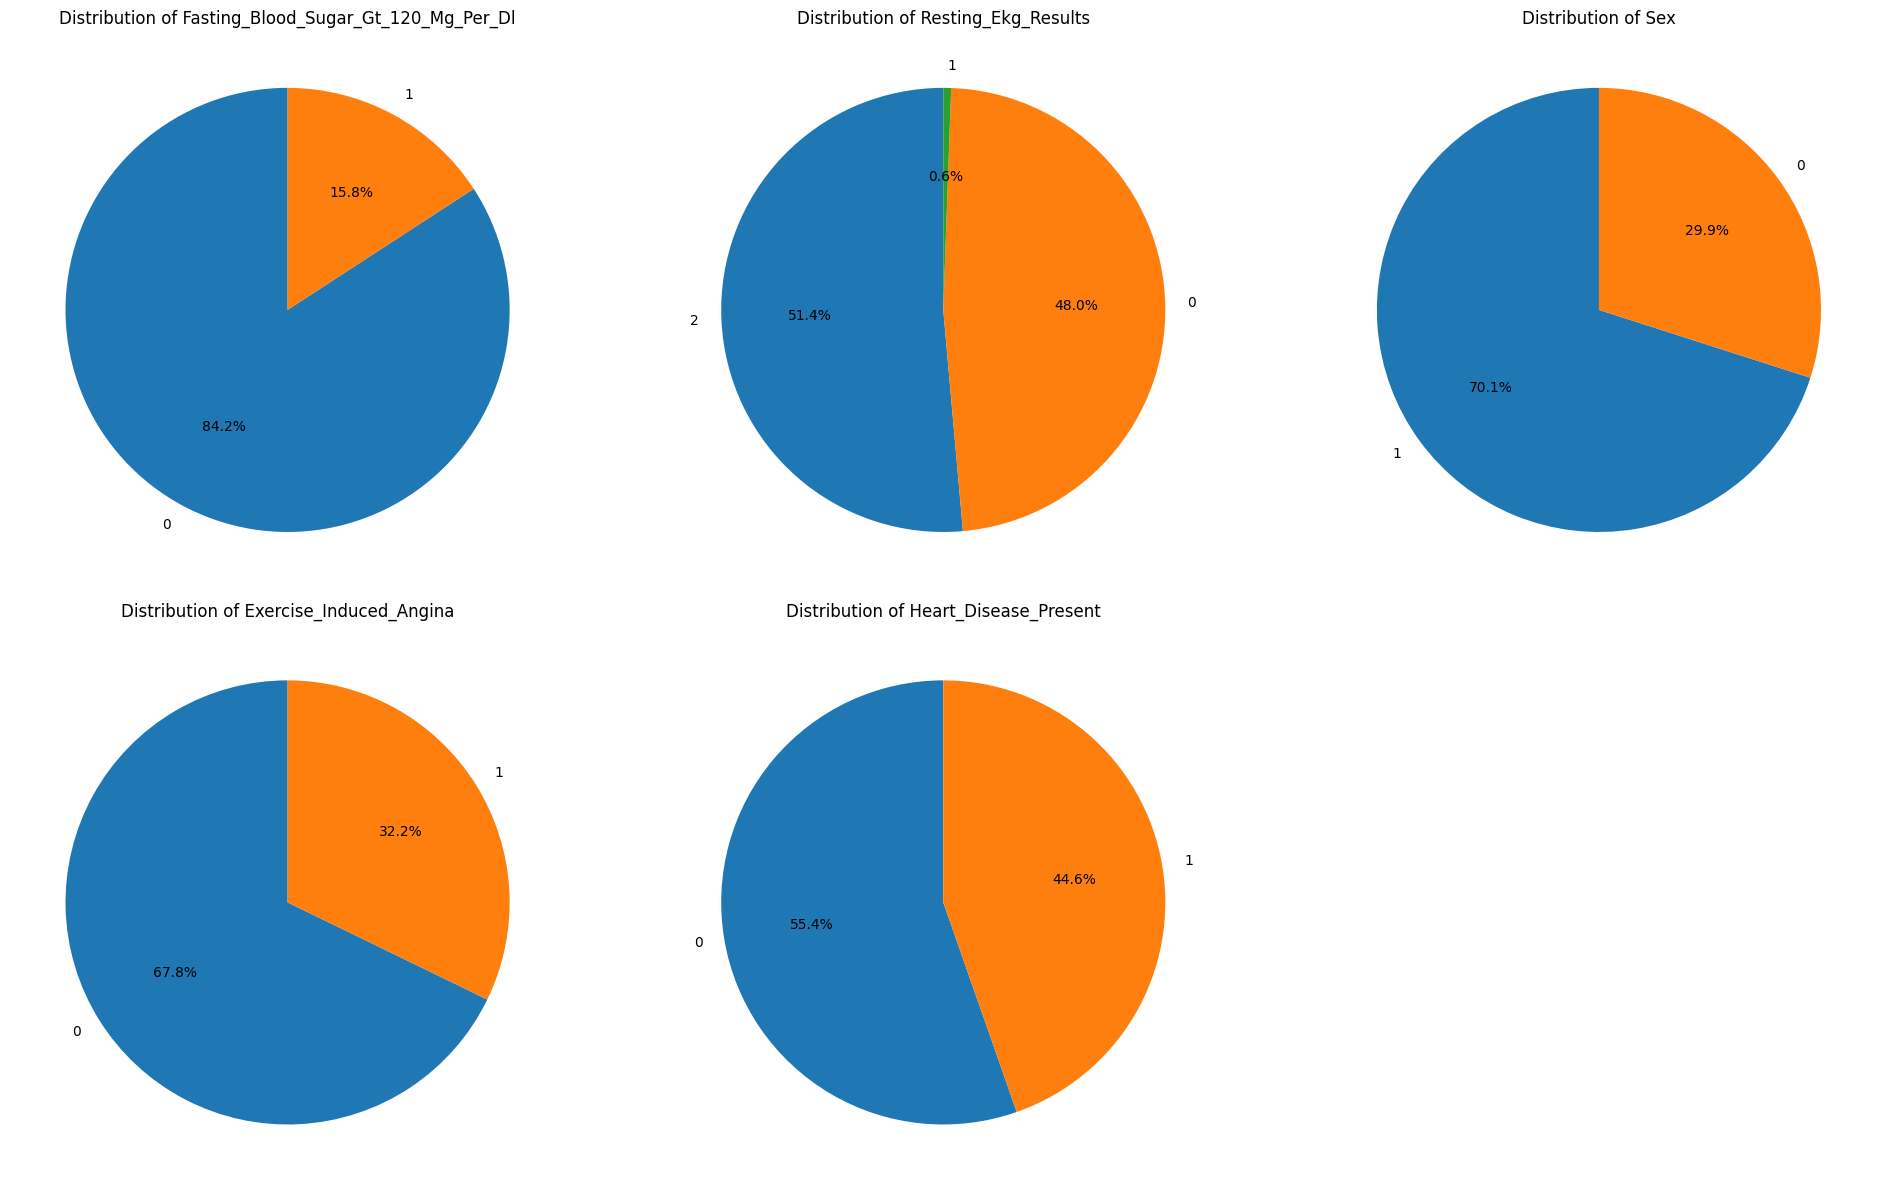

In [34]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, column in enumerate(['fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina','heart_disease_present'], 1):
    ax = plt.subplot(2, 3, idx)
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {column.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#OBSEVATION:
##1.slope_of_peak_exercise_st_segment:
The slope of peak exercise st segment with 3 unique observation, [1:upsloping, 2:flat, 3:downsloping]
52% patient has upsloping peak of exercise st segment, 42% patient has flat slope of peak exercise st segment and remaning 7% patient has downsloping peak of exercise st segment.

##2.RESTING BLOOD PRESSURE:
The blood pressure range between 94 to 180 with 131.3 average
Most of the patient has 130 resting blood pressure

##3.CHEST PAIN TYPE:
Four type of chest pain [1: typical angina(TA), 2: Atypical angina(ATA), 3: non-anginal pain(NAP), 4: asymtomatic(ASY) ]

##4.num_major_vessels:The range of major vessels between 0 to 3
Most (106)number of major vessels is 0, and remaining major vessels is [37,23,14]

##5.fasting_blood_sugar_gt_120_mg_per_dl:
Two categories in fasting blood sugar (1 = true, 0 = false)

##6.resting_ekg_results:
In resting ekg/ecg result 3 uqiue value(0,1,2)
The most (52%)number of ekg result is 2, as well as 0 (normal) ekg result is 47%

##7.serum_cholesterol_mg_per_dl:
The range of serum cholesterol between 126 to 564

##8.OLD PEAK ST DEPRESSION:
The range of old peak st depression between 0 to 6.20

##9.SEX == [0:Female, 1:male]
Most (124) number of patient is male and 56 patient is female

##10.AGE:
The age range between 29 to 77 year
The average age of patient is 54.8 year

##11. MAX HEART RATE:
The most obesrvation of heart rate between 140 to 180
maximum heart rate is 202 and minimum heart rate is 96

##12.EXERCISE INDUCED ANGINA:
 [0: no, 1: yes]
123 patient has no chest pain and reamining 57 patient chest pain

##13. HEART DISEASE == TARGET VERIABLE [0:No heart disease, 1:heart disease]
100 patient has no heart disease and 80 patient has heart disease


##BIVARIATE ANALYSIS

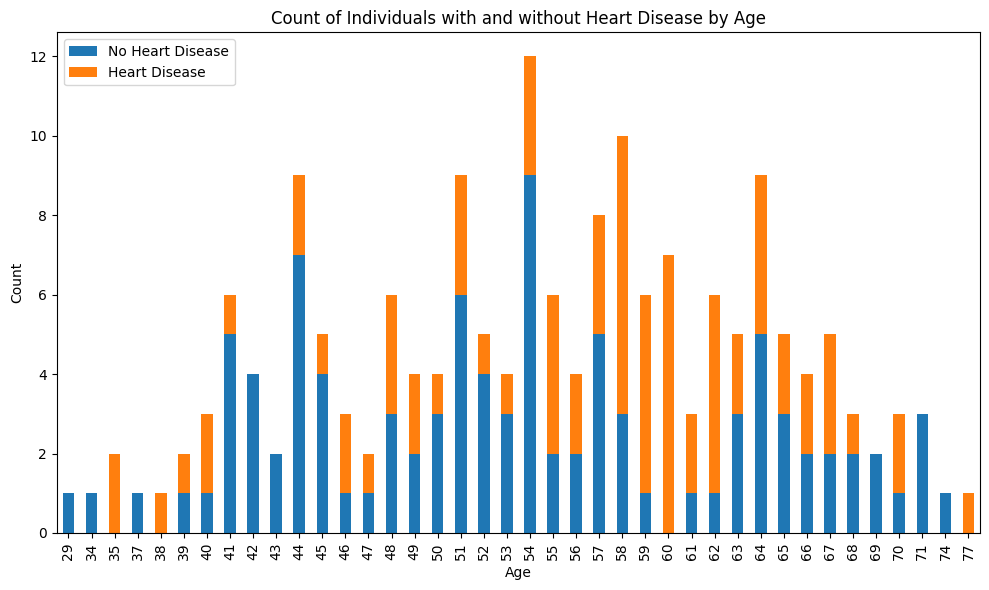

In [35]:
import matplotlib.pyplot as plt
import pandas as pd



# Group by age and count occurrences of heart disease
grouped = df.groupby('age')['heart_disease_present'].value_counts().unstack().fillna(0)

# Plotting grouped bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Individuals with and without Heart Disease by Age')
plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

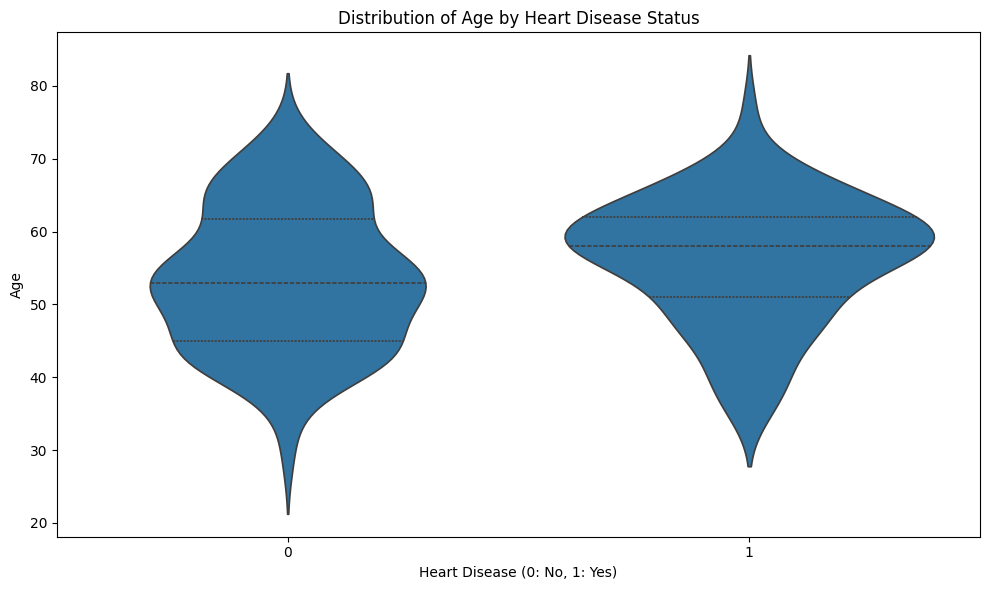

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd




# Plotting violin plot using seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='heart_disease_present', y='age', data=df, inner='quartile')

# Adding labels and title
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Distribution of Age by Heart Disease Status')

# Display the plot
plt.tight_layout()
plt.show()

#IMAPCT OF AGE TO HEART DISEASE:
At the age of 60 the more chance of heart disease and age range between 40 to 70 heart disease chance is 50-50 percent
If age is less than 30 their is no chance of heart disease

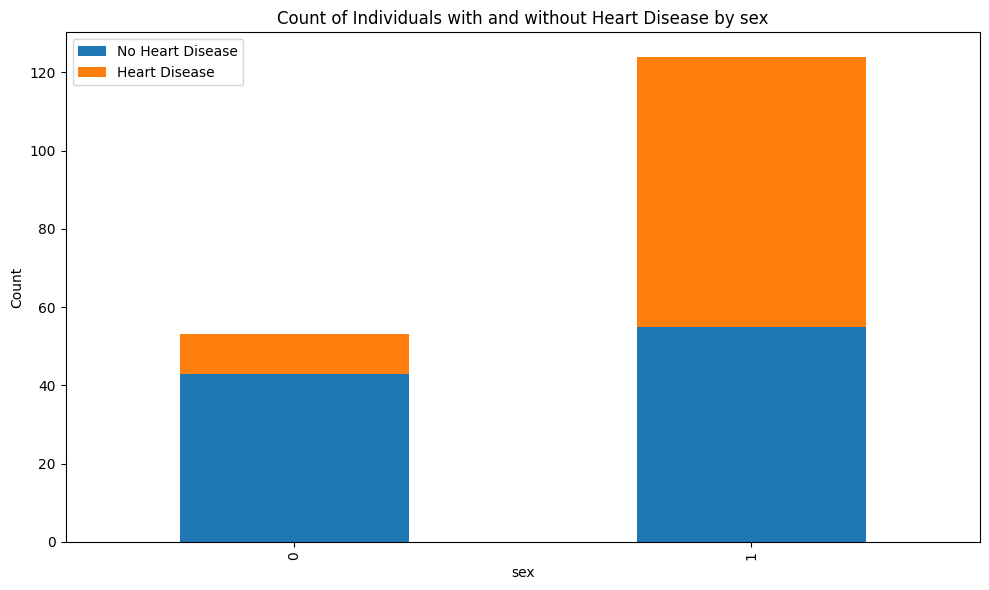

In [37]:
import matplotlib.pyplot as plt
import pandas as pd



# Group by age and count occurrences of heart disease
grouped = df.groupby('sex')['heart_disease_present'].value_counts().unstack().fillna(0)

# Plotting grouped bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Count of Individuals with and without Heart Disease by sex')
plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

##IMPACT OF SEX TO HEART DISEASE:
Male patient has more chance of heart disease than female

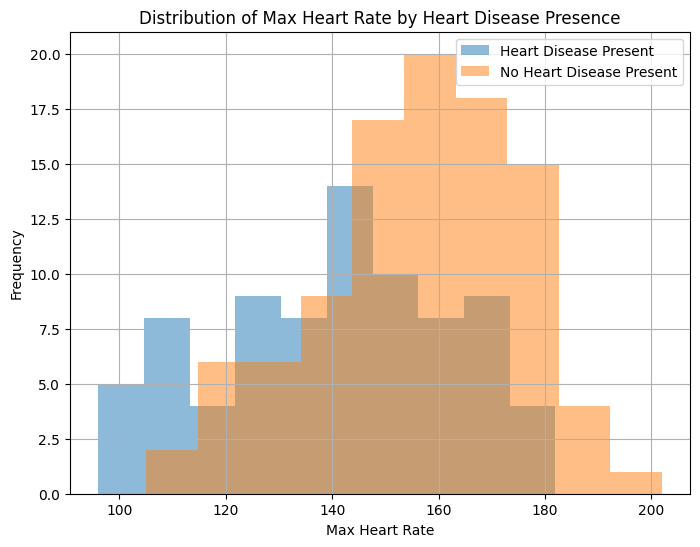

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate data by heart disease presence
heart_disease_present = df[df['heart_disease_present'] == 1]['max_heart_rate_achieved']
no_heart_disease_present = df[df['heart_disease_present'] == 0]['max_heart_rate_achieved']

# Plotting histograms
plt.figure(figsize=(8, 6))
plt.hist(heart_disease_present, bins=10, alpha=0.5, label='Heart Disease Present')
plt.hist(no_heart_disease_present, bins=10, alpha=0.5, label='No Heart Disease Present')
plt.title('Distribution of Max Heart Rate by Heart Disease Presence')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#IMAPCT OF MAX HEART RATE TO HEART DISEASE:
If the heart rate is less than 140 the chance of heart disease is more
Above 140 heart rate chance of heart disease is 50-50 percent.
If the heart rate is more than 180 their is no chance of heart disease

In [39]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : slope_of_peak_exercise_st_segment thal chest_pain_type num_major_vessels fasting_blood_sugar_gt_120_mg_per_dl resting_ekg_results sex exercise_induced_angina heart_disease_present
Numerical Features : resting_blood_pressure serum_cholesterol_mg_per_dl oldpeak_eq_st_depression age max_heart_rate_achieved


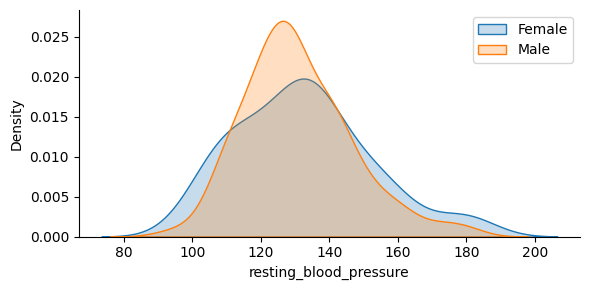

In [40]:
g = sns.FacetGrid(data=df, hue='sex', aspect=2)
g.map(sns.kdeplot, 'resting_blood_pressure', fill=True)
plt.legend(labels=['Female', 'Male'])
plt.show()

In [41]:
df['chest_pain_type'].value_counts()

,count
chest_pain_type,
4,81
3,55
2,28
1,13


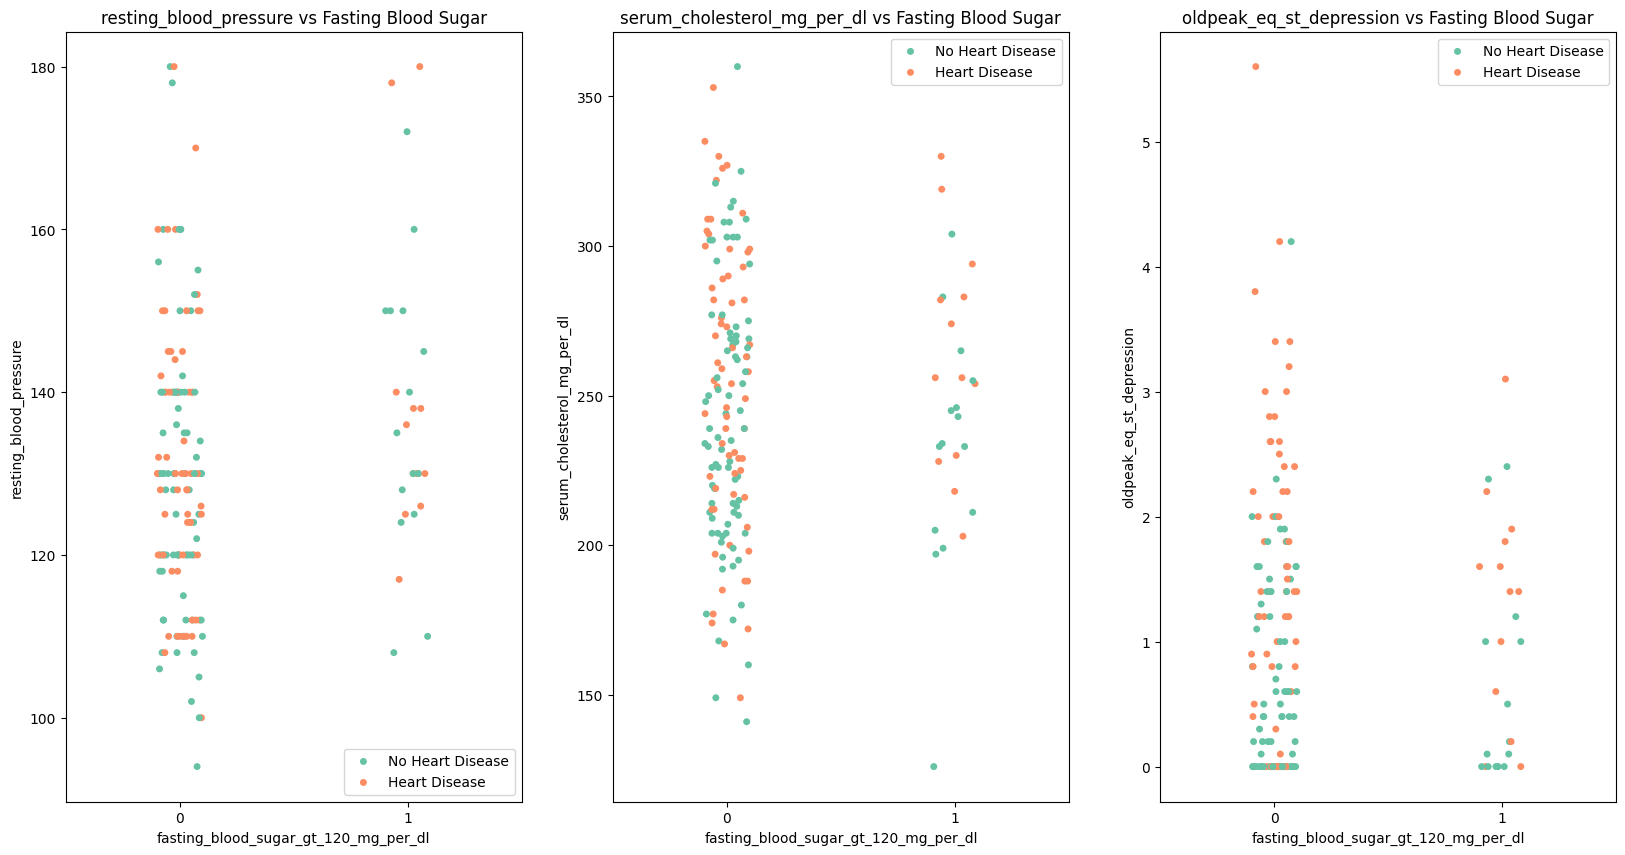

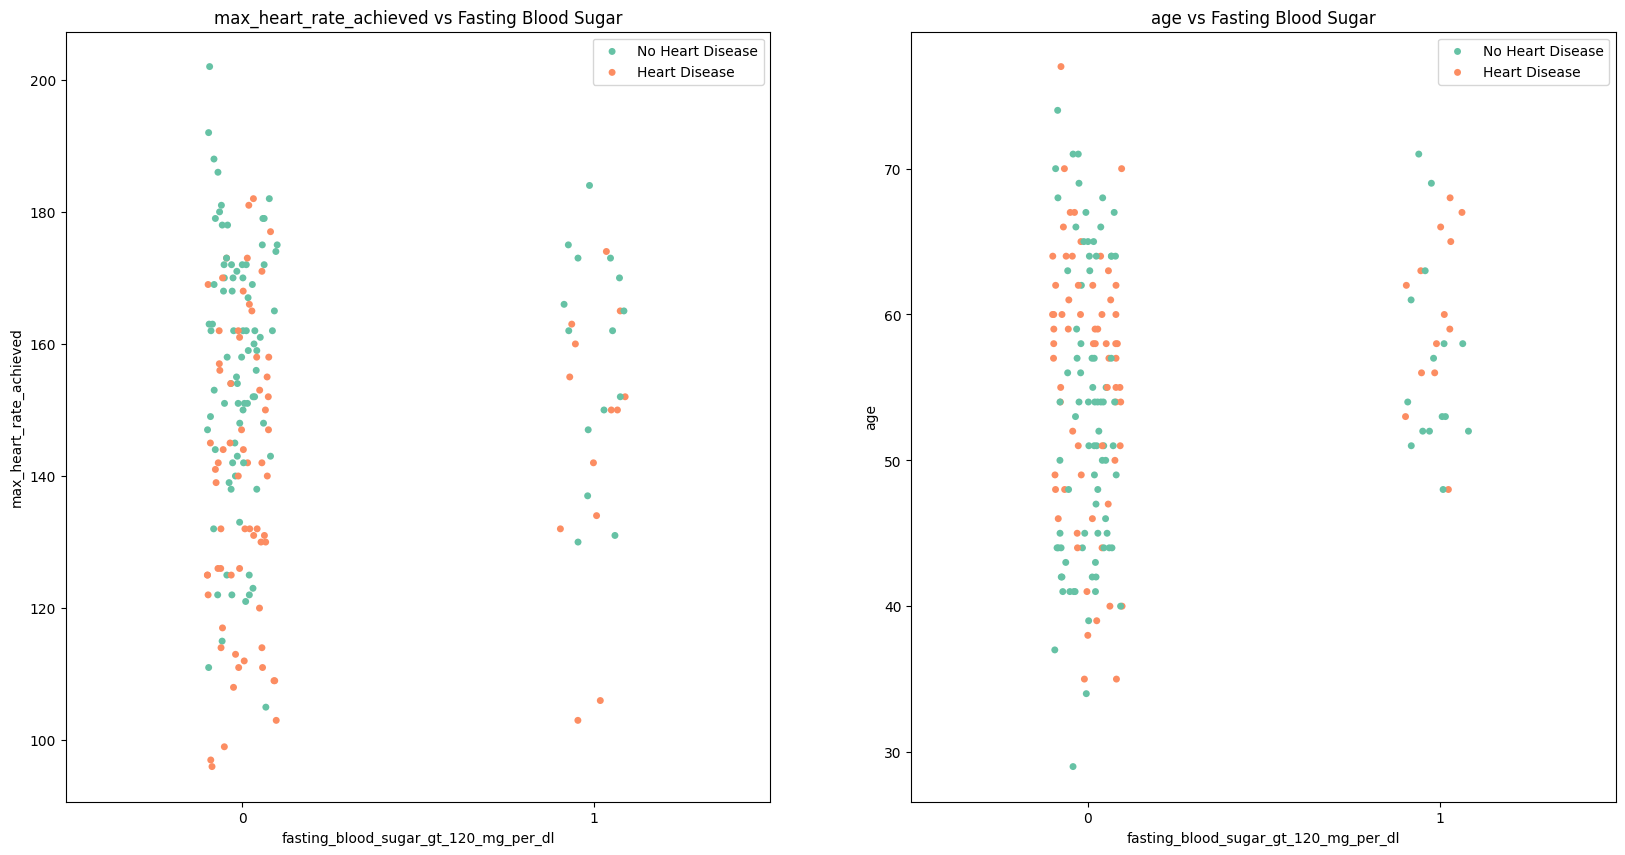

In [42]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,10))
# Define a color palette
color = 'Set2'  # Example palette, choose your preferred one

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'fasting_blood_sugar_gt_120_mg_per_dl',y = numerical_features[i],data = df,hue = 'heart_disease_present',palette = color);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,10))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'fasting_blood_sugar_gt_120_mg_per_dl',y = numerical_features[i],data = df,hue = 'heart_disease_present',palette = color);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

RELATION BETWEEN FASTING BLOOD SUGAR AND AGE WITH RESPECT TO TARGET VERIABLE HEART DISEASE

If the fasting blood sugar is less than 120mg/dl & greter than 120mg/dl with age 0 to 60 the chance of heart disease is 50-50 percent

In [43]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

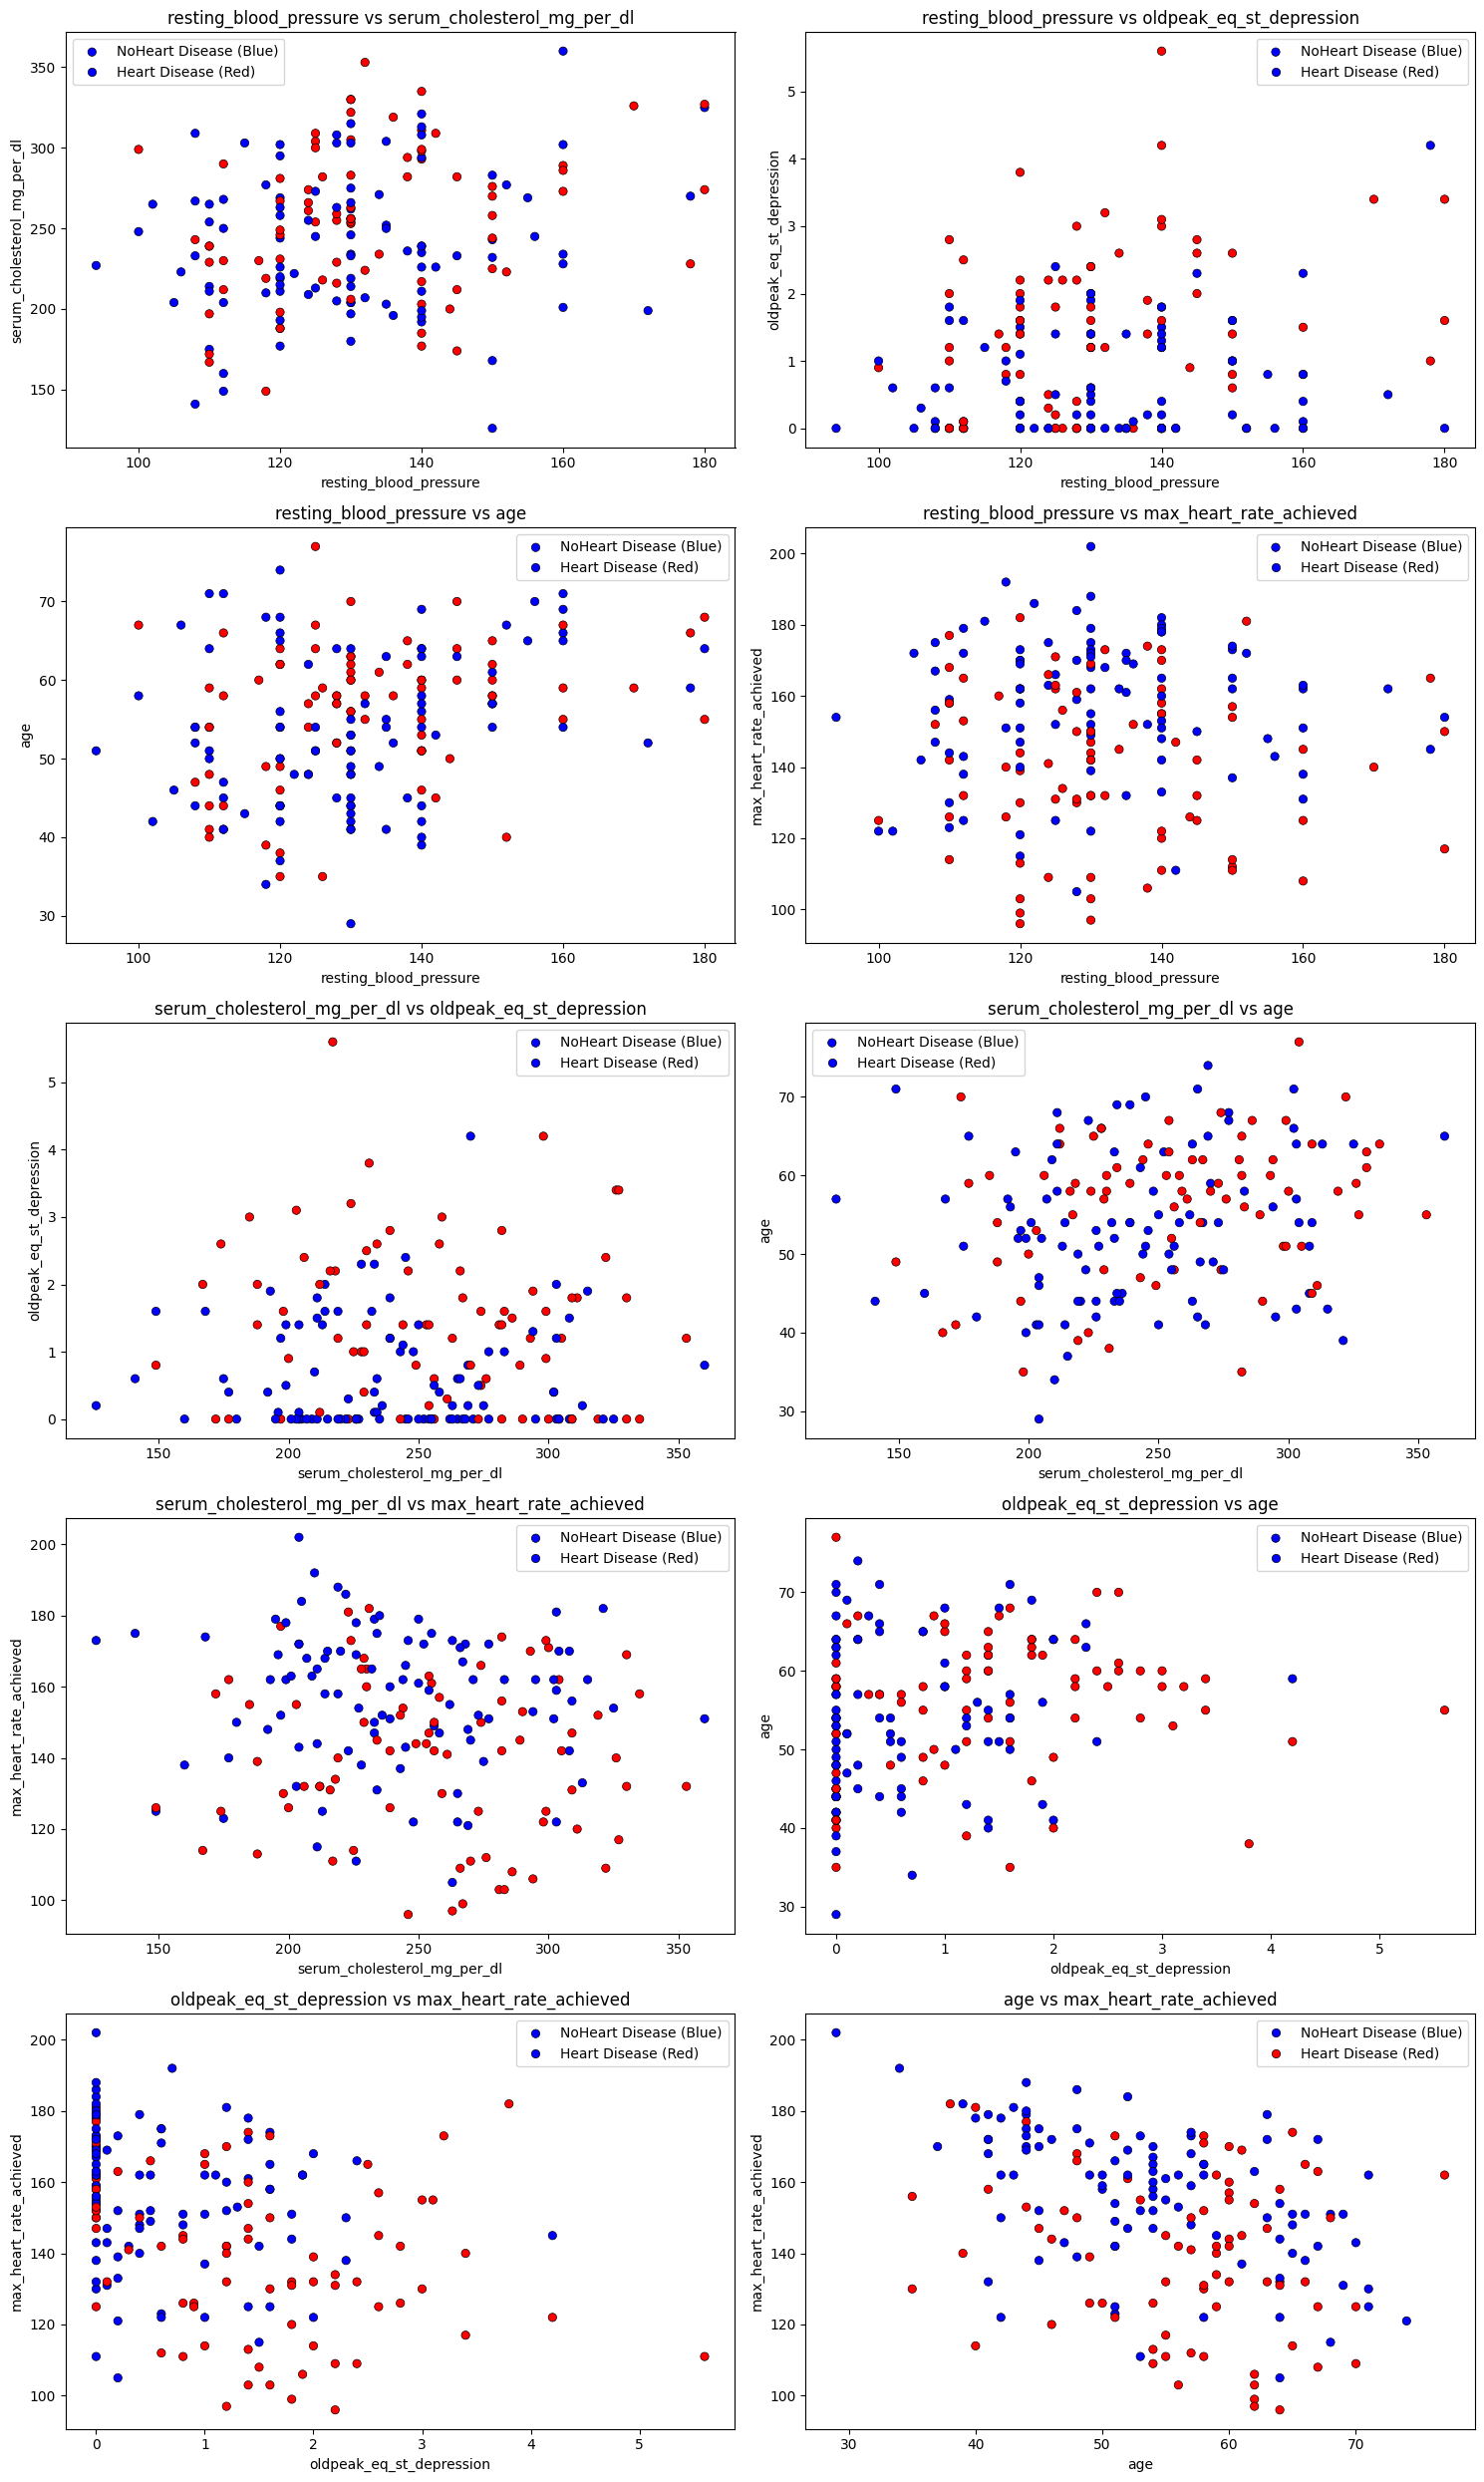

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' and a list of numerical features named 'numerical_features'

a = 0
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Define your desired colors
colors = ['blue', 'red']  # Replace with your preferred colors

for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5, 2, a)
            sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=df, hue='heart_disease_present', palette=colors, edgecolor='black')
            plt.legend(['NoHeart Disease (Blue)', 'Heart Disease (Red)'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['NoHeart Disease (Blue)', 'Heart Disease (Red)']
plt.legend(handles, new_labels)

plt.tight_layout()
plt.show()

##1.RELATION BETWEEN FASTING  resting_blood_pressure AND oldpeak_eq_st_depression WITH RESPECT TO TARGET VERIABLE HEART DISEASE

If the fasting resting_blood_pressure is 150 to 480 with oldpeak_eq_st_depression 100 to 165 the chance of heart disease
is 50-50 percent

##2.RELATION BETWEEN FASTING BLOOD SUGAR AND AGE WITH RESPECT TO TARGET VERIABLE HEART DISEASE
If the fasting resting_blood_pressure 150 to 160 with age 0 to 60 the chance of heart disease is 50-50 percent

##3.their is no any relationship between serum_cholesterol_mg_per_dl and resting_blood_pressure

## 4. probability of having max heart rate is more in males compared to females


# resting_blood_pressure
  STANDARD SCALING
Standard scaling is used because of features are mesure in different units as well as some feature are followed normal distribution
Standard scaling range : -3 to +3

In [45]:
df1=df.copy()

In [46]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['oldpeak_eq_st_depression'] = mms.fit_transform(df1[['oldpeak_eq_st_depression']])
df1['chest_pain_type'] = mms.fit_transform(df1[['chest_pain_type']])
df1['num_major_vessels'] = mms.fit_transform(df1[['num_major_vessels']])
df1['fasting_blood_sugar_gt_120_mg_per_dl'] = mms.fit_transform(df1[['fasting_blood_sugar_gt_120_mg_per_dl']])
df1['age'] = ss.fit_transform(df1[['age']])
df1['resting_ekg_results'] = ss.fit_transform(df1[['resting_ekg_results']])
df1['serum_cholesterol_mg_per_dl'] = ss.fit_transform(df1[['serum_cholesterol_mg_per_dl']])
df1['max_heart_rate_achieved'] = ss.fit_transform(df1[['max_heart_rate_achieved']])
df1['resting_blood_pressure'] = mms.fit_transform(df1[['resting_blood_pressure']])
df1['slope_of_peak_exercise_st_segment'] = mms.fit_transform(df1[['slope_of_peak_exercise_st_segment']])
df1.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,normal,0.395349,0.333333,0.0,0.0,0.969403,1.349454,0.000000,1,-1.037680,0.929136,0,0
1,0.5,normal,0.186047,0.666667,0.0,0.0,-1.037431,-0.728877,0.285714,0,-0.069300,0.387714,0,0
2,0.0,normal,0.360465,1.000000,1.0,0.0,0.969403,1.261014,0.000000,1,2.405448,0.568188,1,1
3,0.0,reversible_defect,0.674419,1.000000,0.0,0.0,-1.037431,-0.529888,0.000000,1,-1.575668,1.425440,0,1
4,1.0,reversible_defect,0.976744,0.000000,0.0,0.0,0.969403,0.509277,0.750000,1,0.468688,-0.198827,0,0


In [47]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [48]:
df1.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,normal,0.395349,0.333333,0.0,0.0,0.969403,1.349454,0.000000,1,-1.037680,0.929136,0,0
1,0.5,normal,0.186047,0.666667,0.0,0.0,-1.037431,-0.728877,0.285714,0,-0.069300,0.387714,0,0
2,0.0,normal,0.360465,1.000000,1.0,0.0,0.969403,1.261014,0.000000,1,2.405448,0.568188,1,1
3,0.0,reversible_defect,0.674419,1.000000,0.0,0.0,-1.037431,-0.529888,0.000000,1,-1.575668,1.425440,0,1
4,1.0,reversible_defect,0.976744,0.000000,0.0,0.0,0.969403,0.509277,0.750000,1,0.468688,-0.198827,0,0


In [49]:
df1.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [54]:
# Replace string values with numerical equivalents in the 'thal' column
df1['thal'] = df1['thal'].replace({'normal': 0, 'reversible_defect': 1, 'fixed_defect': 2})

# Now you can convert the column to integer type
df1['thal'] = df1['thal'].astype(int)

In [55]:
df1.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,0,0.395349,0.333333,0.0,0.0,0.969403,1.349454,0.000000,1,-1.037680,0.929136,0,0
1,0.5,0,0.186047,0.666667,0.0,0.0,-1.037431,-0.728877,0.285714,0,-0.069300,0.387714,0,0
2,0.0,0,0.360465,1.000000,1.0,0.0,0.969403,1.261014,0.000000,1,2.405448,0.568188,1,1
3,0.0,1,0.674419,1.000000,0.0,0.0,-1.037431,-0.529888,0.000000,1,-1.575668,1.425440,0,1
4,1.0,1,0.976744,0.000000,0.0,0.0,0.969403,0.509277,0.750000,1,0.468688,-0.198827,0,0


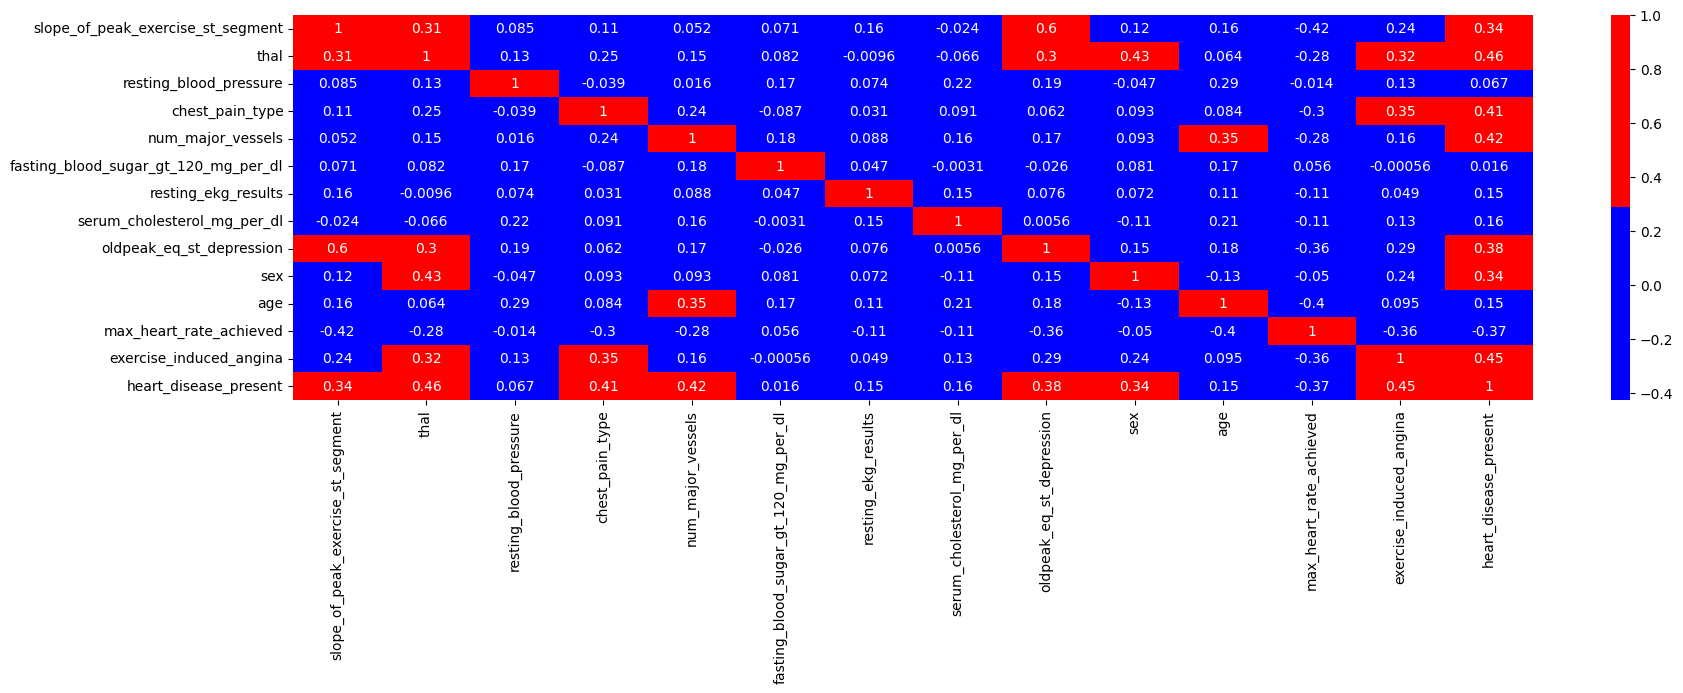

In [56]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

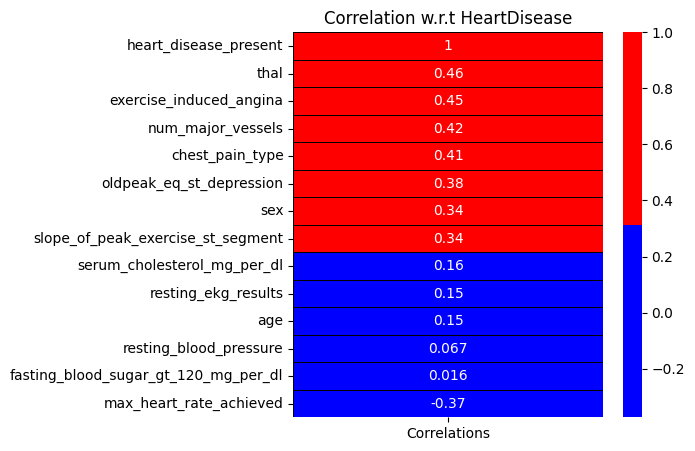

In [57]:
corr = df1.corrwith(df1['heart_disease_present']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

In [58]:
#resting_blood_pressure,thal_fixed_defect,fasting_blood_sugar_gt_120_mg_per_dl show very low correlation with target column

#MODEL CREATION
##AIM
In heart disease case recall metrix is more important so we need more focus to improve recall score
Create sweetspot model (Low bias & Low variance)
##HERE WE WILL BE EXPERIMENTING WITH FOUR ALGORITHM
1.Logistic regression

2.SVC

3.DecisionTree

4.RandomForestClassifier

5.KNeighborsClassifier

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay # Use RocCurveDisplay instead of plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [62]:
features = df1[df1.columns.drop(['resting_blood_pressure','thal','fasting_blood_sugar_gt_120_mg_per_dl','heart_disease_present'])].values
target = df1['heart_disease_present'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [63]:
df1.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,0,0.395349,0.333333,0.0,0.0,0.969403,1.349454,0.000000,1,-1.037680,0.929136,0,0
1,0.5,0,0.186047,0.666667,0.0,0.0,-1.037431,-0.728877,0.285714,0,-0.069300,0.387714,0,0
2,0.0,0,0.360465,1.000000,1.0,0.0,0.969403,1.261014,0.000000,1,2.405448,0.568188,1,1
3,0.0,1,0.674419,1.000000,0.0,0.0,-1.037431,-0.529888,0.000000,1,-1.575668,1.425440,0,1
4,1.0,1,0.976744,0.000000,0.0,0.0,0.969403,0.509277,0.750000,1,0.468688,-0.198827,0,0


In [64]:
target.shape

(177,)

In [65]:
# Import necessary modules
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,RocCurveDisplay,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
import numpy as np

def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

    # Use RocCurveDisplay instead of plot_roc_curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

##1.Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
classifier_lr = LogisticRegression(random_state = 1,C=10,penalty= 'l2')

TRAINING ACCURACY

Accuracy :  77.78%
Cross Validation Score :  89.22%
ROC_AUC Score :  75.92%


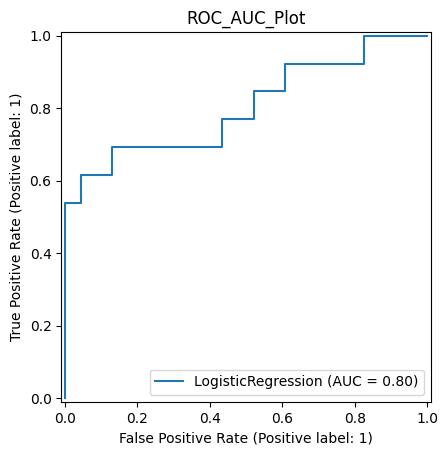

In [68]:
model(classifier_lr)

TESTING ACCURACY

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.69      0.69      0.69        13

    accuracy                           0.78        36
   macro avg       0.76      0.76      0.76        36
weighted avg       0.78      0.78      0.78        36



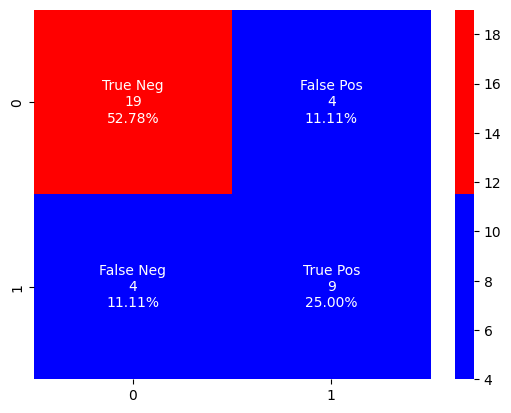

In [69]:
model_evaluation(classifier_lr)

##2.SVC

In [70]:
from sklearn.svm import SVC

In [71]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

TRAINING ACCURACY

Accuracy :  75.00%
Cross Validation Score :  88.02%
ROC_AUC Score :  70.40%


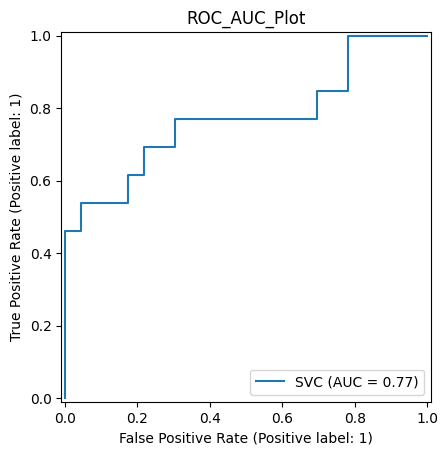

In [72]:
model(classifier_svc)

TESTING ACCURACY

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.70      0.54      0.61        13

    accuracy                           0.75        36
   macro avg       0.73      0.70      0.71        36
weighted avg       0.74      0.75      0.74        36



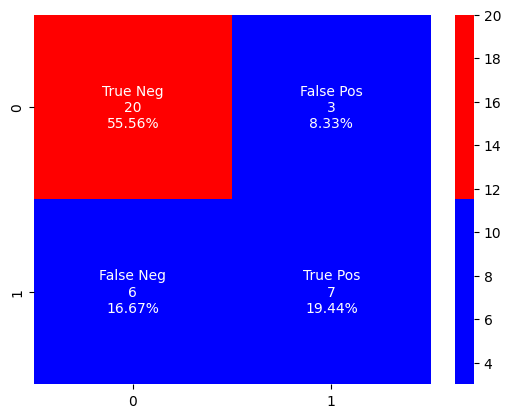

In [73]:
model_evaluation(classifier_svc)

##3.DecisionTree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

TESTING ACCURACY

Accuracy :  55.56%
Cross Validation Score :  78.78%
ROC_AUC Score :  53.51%


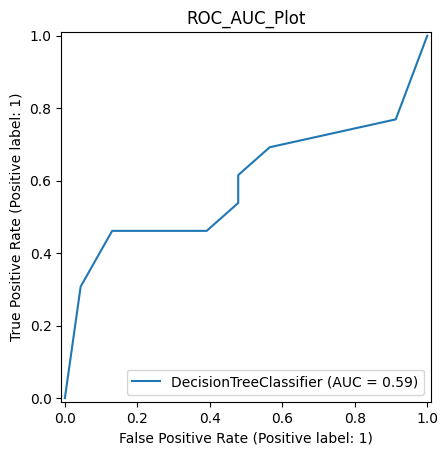

              precision    recall  f1-score   support

           0       0.67      0.61      0.64        23
           1       0.40      0.46      0.43        13

    accuracy                           0.56        36
   macro avg       0.53      0.54      0.53        36
weighted avg       0.57      0.56      0.56        36



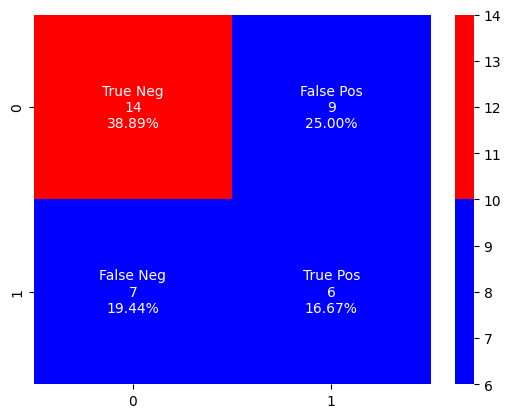

In [77]:
# Call the 'model' function to train the DecisionTreeClassifier before evaluating it
model(classifier_dt)

# Now you can evaluate the trained model
model_evaluation(classifier_dt)

##4.RandomForest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

TESTING ACCURACY

Accuracy :  77.78%
Cross Validation Score :  88.56%
ROC_AUC Score :  75.92%


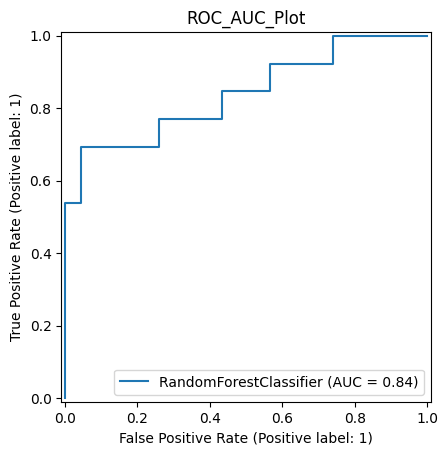

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.69      0.69      0.69        13

    accuracy                           0.78        36
   macro avg       0.76      0.76      0.76        36
weighted avg       0.78      0.78      0.78        36



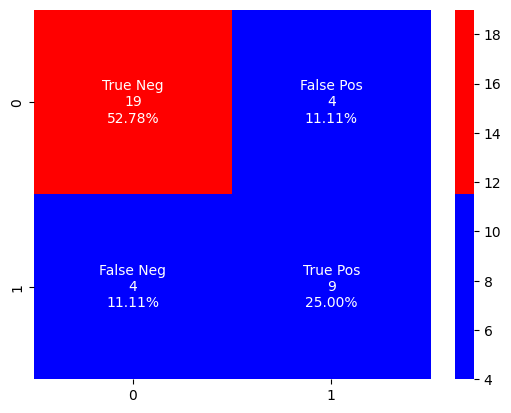

In [81]:
model(classifier_rf)
model_evaluation(classifier_rf)

##5.KNeighbors

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

TESTING ACCURACY

Accuracy :  75.00%
Cross Validation Score :  80.96%
ROC_AUC Score :  75.42%


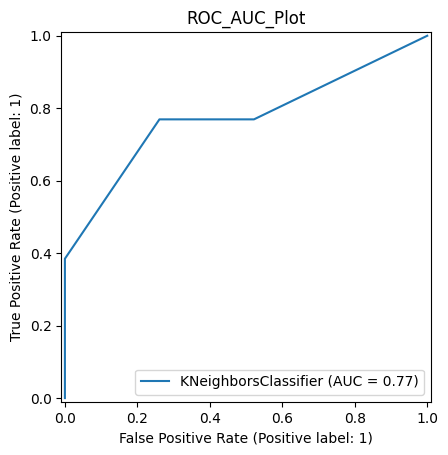

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.62      0.77      0.69        13

    accuracy                           0.75        36
   macro avg       0.74      0.75      0.74        36
weighted avg       0.77      0.75      0.75        36



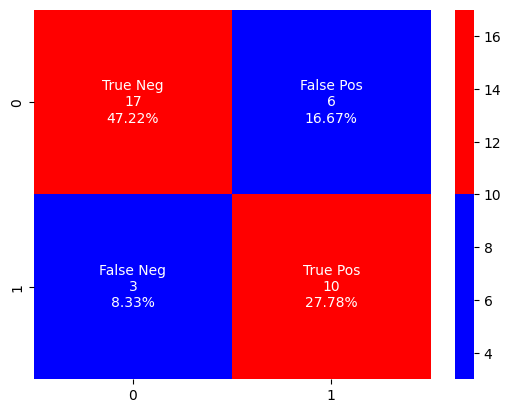

In [85]:
model(classifier_knn)
model_evaluation(classifier_knn)

##KEY FINDINGS
1.Logistic Regression algorithm performed the best.SVM gave us second largest accuracy value.
2.we compared with other algorithms like random forest,decision tree,knn regressor.


##Challenges Faced
1.As their were many columns the analysis was difficult so we decided to use only  those columns that showed high   correlation with output column using correaltion graph.

2.Handling outliers required some domain analysis so that was also a bit challenging task.